<a href="https://colab.research.google.com/github/KhamessiTaha/CarVisionProject/blob/main/Car_Model_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile


train_zip_path = '/content/drive/MyDrive/batch_one/batch_one_train.zip'


extracted_train_folder = '/content/drive/MyDrive/batch_one/train'


with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_train_folder)

print("Training data extraction completed.")


Training data extraction completed.


In [ ]:

test_zip_path = '/content/drive/MyDrive/batch_one/batch_one_test.zip'


extracted_test_folder = '/content/drive/MyDrive/batch_one/test'


with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_test_folder)

print("Testing data extraction completed.")



Testing data extraction completed.


In [ ]:
%cd /content/drive/MyDrive/batch_one/
!ls

/content/drive/MyDrive/batch_one
batch_one_test.zip  batch_one_train.zip  test  train


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/batch_one/')
print(data_dir)

/content/drive/MyDrive/batch_one


/content/drive/MyDrive/batch_one/train/images/946463.jpg


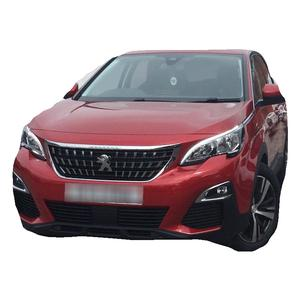

In [13]:
cars_train = list(data_dir.glob('train/images/*'))
print(cars_train[0])
PIL.Image.open(str(cars_train[500]))

/content/drive/MyDrive/batch_one/test/images/73055.jpg


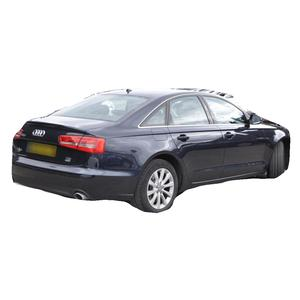

In [14]:
cars_test = list(data_dir.glob('test/images/*'))
print(cars_test[0])
PIL.Image.open(str(cars_test[0]))

In [73]:
train_labels_df = pd.read_csv('/content/drive/MyDrive/batch_one/train/train_labels.csv')
test_labels_df = pd.read_csv('/content/drive/MyDrive/batch_one/test/test_labels.csv')


train_labels_df['Make'] = train_labels_df['Make'].astype(str)
train_labels_df['Model'] = train_labels_df['Model'].astype(str)
train_labels_df['Year'] = train_labels_df['Year'].astype(str)

test_labels_df['Make'] = test_labels_df['Make'].astype(str)
test_labels_df['Model'] = test_labels_df['Model'].astype(str)
test_labels_df['Year'] = test_labels_df['Year'].astype(str)


In [74]:
img_height,img_width=300,300
batch_size=32
train_aug = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    height_shift_range=0.1,
    width_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    zoom_range = [1, 1.5],
    fill_mode='nearest'
)
test_aug = ImageDataGenerator(rescale=1./255)



In [75]:

col =['Make', 'Model', 'Year']

train_generator = train_aug.flow_from_dataframe(
    dataframe=train_labels_df,
    directory='train/images',
    x_col='Image',
    y_col=col,
    target_size=(img_height,img_width),
    seed=42,
    batch_size=batch_size,
    class_mode='raw',
    shuffle=True
)

Found 32000 validated image filenames.


In [76]:
test_generator = test_aug.flow_from_dataframe(
    dataframe=test_labels_df,
    directory='test/images',
    x_col='Image',
    y_col=col,
    target_size=(img_height,img_width),
    seed=42,
    batch_size=batch_size,
    class_mode='raw',
    shuffle=False
)

Found 7229 validated image filenames.


In [85]:
class_names = train_labels_df[['Make', 'Model', 'Year']].apply(lambda x: '_'.join(x), axis=1).unique()
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print(class_names)


Number of classes: 200
['Vauxhall_Corsa_2008' 'Ford_Kuga_2013' 'Renault_Kadjar_2017'
 'Fiat_500_2008' 'Peugeot_207_2008' 'Vauxhall_Mokka_2015'
 'Ford_Focus_2008' 'SEAT_Ibiza_2011' 'Honda_CR-V_2012'
 'Vauxhall_Astra_2006' 'Land Rover_Range Rover_2015' 'Ford_Focus_2015'
 'BMW_X5_2016' 'Ford_Fiesta_2005' 'Vauxhall_Insignia_2011' 'BMW_X5_2005'
 'Ford_Kuga_2014' 'Jaguar_X-Type_2009' 'Nissan_Qashqai_2015'
 'Vauxhall_Mokka_2014' 'Ford_Mondeo_2011' 'Ford_Fiesta_2017'
 'Toyota_Auris_2015' 'Vauxhall_Corsa_2018' 'Ford_Focus_2010'
 'Vauxhall_Insignia_2015' 'Vauxhall_Corsa_2016' 'Jaguar_XF_2014'
 'Nissan_Qashqai_2012' 'Renault_Clio_2010' 'Vauxhall_Zafira Tourer_2017'
 'Vauxhall_Astra_2015' 'Vauxhall_Corsa_2012' 'Volkswagen_Golf_2017'
 'Jaguar_XF_2012' 'Audi_A3_2005' 'Audi_A4_2012' 'Fiat_Punto Evo_2010'
 'Ford_Ka_2015' 'BMW_1 Series_2019' 'BMW_X5_2007' 'Citroen_DS3_2014'
 'BMW_X5_2010' 'Volkswagen_Passat_2015' 'Ford_Ka_2010'
 'Volkswagen_Polo_2006' 'Ford_Ka_2009' 'Citroen_C3_2019'
 'Mazda_Mazda3_201

In [ ]:

augmented_images, _ = train_aug.flow(train_generator, batch_size=6).next()

plt.figure(figsize=(10, 10))
for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].astype("uint8"))
    plt.axis("off")
plt.show()

#Training The Model

In [77]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(
                   include_top=False,
                   input_shape=(300,300,3),
                   pooling='avg',
                   classes=200,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(200, activation='softmax'))

In [78]:
resnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_24 (ModuleW  (None, 2048)              0         
 rapper)                                                         
                                                                 
 module_wrapper_25 (ModuleW  (None, 512)               1049088   
 rapper)                                                         
                                                                 
 module_wrapper_26 (ModuleW  (None, 200)               102600    
 rapper)                                                         
                                                                 
Total params: 24739400 (94.37 MB)
Trainable params: 1151688 (4.39 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [79]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [81]:

history = resnet_model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node categorical_crossentropy/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-80-2201c58a0fc7>", line 2, in <cell line: 2>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2198, in categorical_crossentropy

2 root error(s) found.
  (0) UNIMPLEMENTED:  Cast string to float is not supported
	 [[{{node categorical_crossentropy/Cast}}]]
  (1) CANCELLED:  Function was cancelled before it was started
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_80916]